<a href="https://colab.research.google.com/github/schakosss/halal-feleves/blob/main/halal_lzanmg_feleves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()


Saving cica.jpg to cica.jpg


{'cica.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x01,\x01,\x00\x00\xff\xdb\x00C\x00\x06\x04\x05\x06\x05\x04\x06\x06\x05\x06\x07\x07\x06\x08\n\x10\n\n\t\t\n\x14\x0e\x0f\x0c\x10\x17\x14\x18\x18\x17\x14\x16\x16\x1a\x1d%\x1f\x1a\x1b#\x1c\x16\x16 , #&\')*)\x19\x1f-0-(0%()(\xff\xdb\x00C\x01\x07\x07\x07\n\x08\n\x13\n\n\x13(\x1a\x16\x1a((((((((((((((((((((((((((((((((((((((((((((((((((\xff\xc0\x00\x11\x08\x03\x00\x04\x00\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x02\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\x05\x02\x03\x06\x01\x00\x07\x08\xff\xc4\x00B\x10\x00\x02\x01\x03\x03\x03\x03\x02\x04\x05\x03\x04\x02\x01\x00\x0b\x01\x02\x03\x00\x04\x11\x12!1\x05\x13A"Qa2q\x06\x14#\x81BR\x91\xa1\xb13\xc1\xd1\x07\x15$b\xe1\xf0C\xf1r\x82%\x164S\x92\xa2\x17D\xff\xc4\x00\x19\x01\x00\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x00\x04\x05\xff\xc4\x00,\x11\x00\x02\x02\x02\x03\x00\x02\x03\x01\x00\x01\x04\x03\x01\x01\x00\x00\x01\x02\x11!1

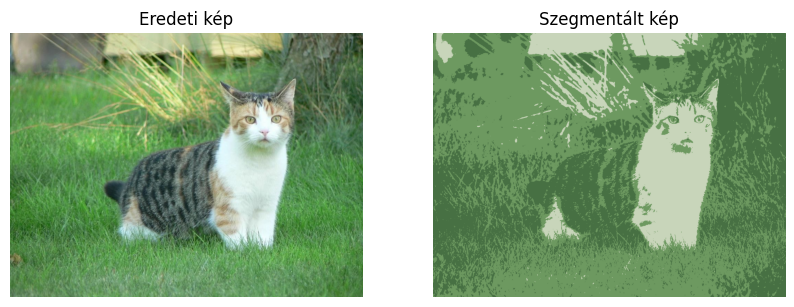

In [2]:
#k-means képszeg
import numpy as np
import matplotlib.pyplot as plt
import cv2

img = cv2.imread('cica.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
pixels = img.reshape((-1, 3)).astype(np.float32)

def d(x, y):
    return np.linalg.norm(x - y)

def initialize(S, N):
    i = np.random.choice(S.shape[0], N, replace=False)
    return S[i]

def k_means(S, N):
    C = initialize(S, N)
    C_new = C.copy()
    while True:
        C = C_new.copy()
        K = [[] for _ in range(N)]
        for x in S:
            i = np.argmin([d(x, ci) for ci in C])
            K[i].append(x)
        C_new = []
        for ki in K:
            if ki:
                ki = np.array(ki)
                c = np.sum(ki, axis=0) / len(ki)
                C_new.append(c)
            else:
                C_new.append(np.zeros(S.shape[1]))
        C_new = np.array(C_new)
        if np.allclose(C, C_new, atol=1.0):
            break
    labels = []
    for x in S:
        i = np.argmin([d(x, ci) for ci in C_new])
        labels.append(i)
    return np.array(labels), np.array(C_new)

N = 3
labels, centers = k_means(pixels, N)
segmented = centers[labels].reshape(img.shape).astype(np.uint8)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Eredeti kép')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(segmented)
plt.title('Szegmentált kép')
plt.axis('off')
plt.show()



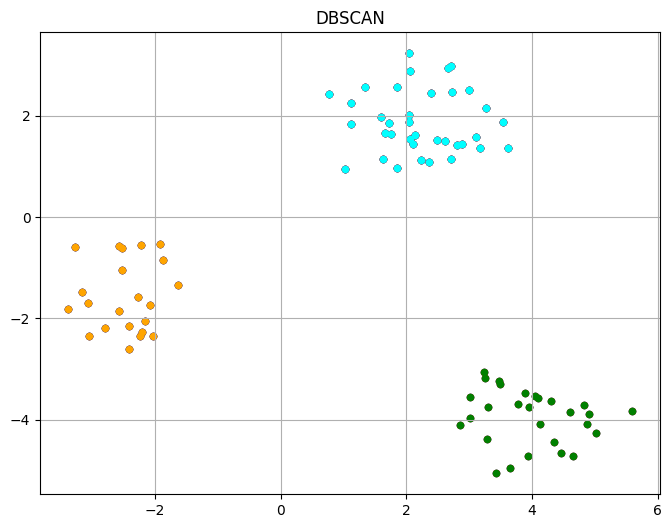

In [8]:
#dbscan-gócpontkeresés
import numpy as np
import matplotlib.pyplot as plt

g1 = np.random.randn(40, 2) + [2, 2]
g2 = np.random.randn(40, 2) + [-2, -2]
g3 = np.random.randn(40, 2) + [4, -4]
adatok = np.vstack((g1, g2, g3))

eps = 0.7
minpts = 6

def d(x, y):
    return np.linalg.norm(x - y)

def dbscan(S, eps, minpts):
    C = []
    I = set()
    for p in S:
        if tuple(p) in I:
            continue
        Q = []
        for x in S:
            if d(p, x) <= eps:
                Q.append(x)
        if len(Q) >= minpts:
            for q in Q:
                if tuple(q) not in I:
                    I.add(tuple(q))
            i = 0
            while i < len(Q):
                q = Q[i]
                D = []
                for x in S:
                    if d(q, x) <= eps:
                        D.append(x)
                if len(D) >= minpts:
                    for x in D:
                        if tuple(x) not in map(tuple, Q):
                            Q.append(x)
                i += 1
            C.append(np.array(Q))
    return C

klaszterek = dbscan(adatok, eps, minpts)

szinek = ['red', 'green', 'blue', 'orange', 'purple', 'cyan']
plt.figure(figsize=(8, 6))
for i, klaszter in enumerate(klaszterek):
    plt.scatter(klaszter[:, 0], klaszter[:, 1], s=20, color=szinek[i % len(szinek)])
plt.title('DBSCAN')
plt.grid(True)
plt.show()


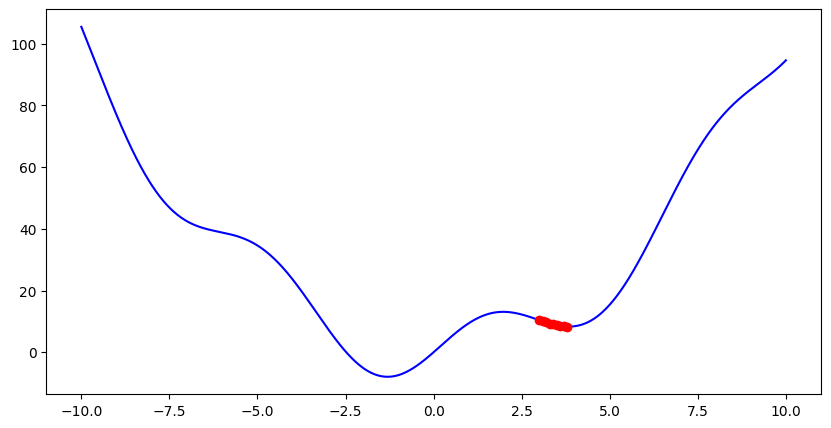

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2 + 10 * np.sin(x)


x = 3.0
step_size = 0.1
max_iter = 100

path_x = [x]
path_y = [f(x)]

for _ in range(max_iter):
    neighbors = [x - step_size, x + step_size]
    neighbor_vals = [f(n) for n in neighbors]
    best = neighbors[np.argmin(neighbor_vals)]

    if f(best) < f(x):
        x = best
        path_x.append(x)
        path_y.append(f(x))
    else:
        break

x_vals = np.linspace(-10, 10, 1000)
y_vals = f(x_vals)

plt.figure(figsize=(10, 5))
plt.plot(x_vals, y_vals, label='f(x) = x² + 10·sin(x)', color='blue')
plt.scatter(path_x, path_y, color='red', zorder=5, label='Hegymászó lépések')
plt.plot(path_x, path_y, color='red', linestyle='--', alpha=0.6)
plt.show()
